<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/new_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get update -qqq && apt-get dist-upgrade -qqq -y

In [3]:
# https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
!apt-get install libproj-dev proj-data proj-bin -qqq -y
!apt-get install libgeos-dev -qqq -y
!pip install -q -U cython
!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Selecting previously unselected package libgeos-dev.
(Reading database ... 132714 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 8.9MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadat

In [0]:
# https://gadm.org/about.html
!wget -q "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip"
!unzip -qq -u gadm36_BRA_shp.zip

In [0]:
import geopandas as gpd
import geoplot as gplt

br = gpd.read_file('gadm36_BRA_1.shp')

In [9]:
import pandas as pd

#antigo
#pca_vals = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/pca_values_08-19.csv?token=AJW2VYKF6JXIF7CPJPIX4YC5X3H4E")

#novo: pc1_2019.csv
pca_vals = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/pc1_2019.csv?token=AFPQLZH5NNQGDME6R3PPGFS5X5EIY")
pca_vals.head(1)

,Unnamed: 0,id,0,lon,lat
0,0,82024,11.888933,-60.65,2.816667


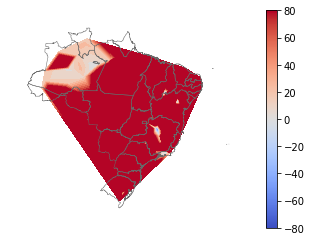

In [10]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

lons = pca_vals["lon"].to_numpy()[:]
lats = pca_vals["lat"].to_numpy()[:]
data = pca_vals["0"].to_numpy()[:] # 0th princomp

ax = plt.axes(projection=ccrs.Miller())

lb = -80; ub = 80; lv = 20 # lower bound, upper bound,levels

plt.tricontourf(lons, lats, data, np.linspace(lb, ub, lv),
                cmap="coolwarm", extend="both")

gplt.polyplot(br, edgecolor="dimgray", linewidth=0.5, zorder=1, ax=ax)

plt.colorbar(ScalarMappable(norm=Normalize(-80, 80), cmap="coolwarm"), ax=ax)

plt.show()